# Machine Learning Project - The Bank Marketing Campaign

I7isai

The Bank marketing team wants to launch a new campaign whose objective is to convince customers to open term deposits.

Until now the strategy was to call as many people as possible, indiscriminately, and try to sell them the product. However, this approach, in addition to spending more resources because it implies having several people calling all customers, is also uncomfortable for some customers who do not like to be bothered with this type of calls. After, it was concluded that:

    - For each customer identified as a good candidate, and who is the target of the campaign but does not adhere to the term deposit, the bank has a cost of 500 euros.
    - For each customer who is identified as a bad candidate, and as such is not the target of the campaign but was actually a good candidate and would join, the bank has a cost of 2000 euros.
    
Based on this information, can you help the marketing team by creating a model that selects the best candidates to be targeted by the campaign, in order to reduce costs?


**The dataset contains information about all customers who were targeted by the campaign:**

    1 - age 
    2 - job : type of job 
    3 - marital : marital status
    4 - education
    5 - default: has credit in default? 
    6 - housing: has housing loan? 
    7 - loan: has personal loan? 
    8 - pdays: number of days that passed by after the client was last contacted from a previous campaign 
    9 - previous: number of contacts performed before this campaign and for this client 
    10 - poutcome: outcome of the previous marketing campaign 
    11 - emp.var.rate: employment variation rate - quarterly indicator 
    12 - cons.price.idx: consumer price index - monthly indicator
    13 - cons.conf.idx: consumer confidence index - monthly indicator 
    14 - euribor3m: euribor 3 month rate - daily indicator 
    15 - nr.employed: number of employees - quarterly indicator 

**Output:**
    
    y: has the client subscribed a term deposit? 
    
  

#### QUESTIONS:

    1. How many features are available? How many customers?
    2. How many clients do you have in the dataset that actually subscribed to the term deposit? And how many did not?
    3. What are the most relevant features to decide if a customer is more likely to adhere to the term deposit?
    4. Which algorithm led to the best results?
    5. Which evaluation metrics did you use to compare the performance of the various models? Why?
    6. What is the cost of the bank without any model?
    7. What is the cost that the bank will have with your model?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.metrics import classification_report


seed = 42

In [5]:
df = pd.read_csv('bank_marketing_campaign.csv')

In [6]:
df

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# EDA AND DATASET CHANGES

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [8]:
df.shape

(41188, 16)

In [9]:
df.isnull().mean() *100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [10]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [11]:
df_cat = df.select_dtypes(exclude='number')

for col in df_cat:
  print(df_cat[col].value_counts())
  print('-----###-----')
  print(df_cat[col].mode())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
-----###-----
0    admin.
dtype: object
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
-----###-----
0    married
dtype: object
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
-----###-----
0    university.degree
dtype: object
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
-----###-----
0    no
dtype: object
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
-----###----

In [12]:
df.var()

C:\Users\JLCoito\AppData\Local\Temp/ipykernel_8136/1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


age                 108.602451
pdays             34935.687284
previous              0.244927
emp.var.rate          2.467915
cons.price.idx        0.335056
cons.conf.idx        21.420215
euribor3m             3.008308
nr.employed        5220.283250
dtype: float64

In [13]:
d_y = {'no': 0, 'yes': 1}

df['y'] = df['y'].replace(d_y)

In [14]:
# The dataset have several categoric features.

#List of changes:

# job -> One Hot Encoding
# marital -> One Hot Encoding
# education -> Ordinal Encoding (university.degree: 6, high.school: 5, basic.9y: 3, professional.course: 4, basic.4y: 1, basic.6y: 2, unknown: 0, illiterate: -1)
# housing -> One Hot Encoding
# default -> Ordinal encoding (no:1 unkonw:0 yes:-1)
# loan -> One hot encoding (or Ordinal Encoding - I didn't have time to try)
# poutcome - > One hot encoding (or Ordinal Encoding - I didn't have time to try)

# I am aware that these transformations might lead to too many features and the curse of dimensionality

In [15]:
# get dumies

df_dumies = pd.get_dummies(df[['job', 'marital', 'housing', 'loan', 'poutcome']])

In [16]:
df_t = pd.concat([df, df_dumies], axis=1)

In [17]:
# ordinal encoding

d_educations = {'university.degree': 6, 'high.school': 5, 'basic.9y': 3, 'professional.course': 4, 'basic.4y': 1, 'basic.6y': 2, 'unknown': 0, 'illiterate': -1}

df_t['education'] = df_t['education'].replace(d_educations)

In [18]:
d_educations = {'no':1, 'unknown':0, 'yes':-1}

df_t['default'] = df_t['default'].replace(d_educations)

In [19]:
df_t.drop(['job', 'marital', 'housing', 'loan', 'poutcome'], inplace=True, axis=1)

In [20]:
df_t.head(2)

,age,education,default,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,1,0,0,0,1,0
1,57,5,0,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,1,0,0,0,1,0


<AxesSubplot:>

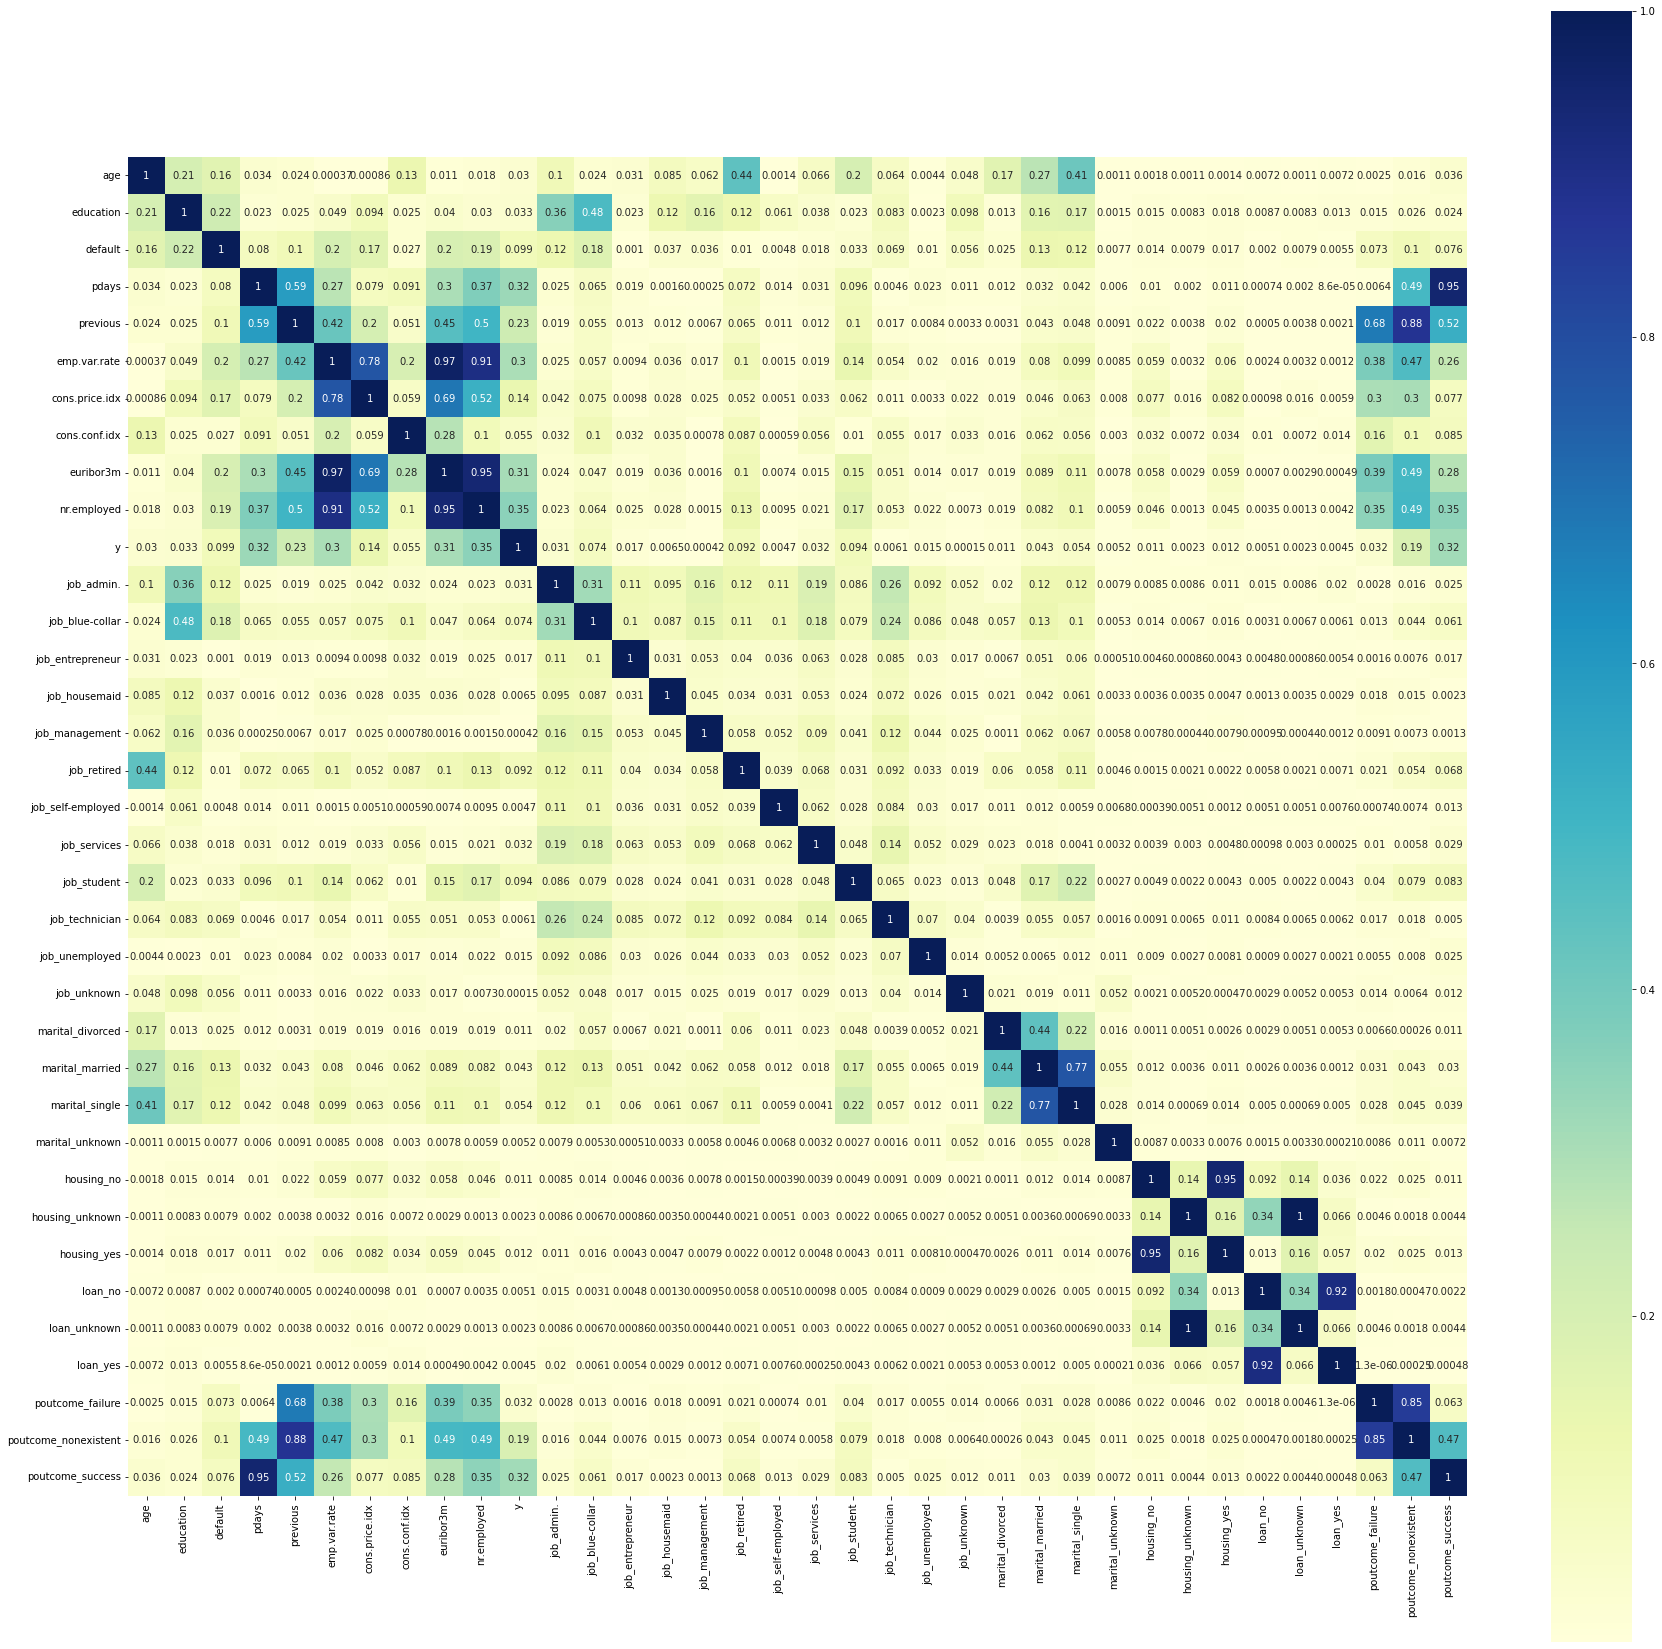

In [21]:
fig = plt.figure(figsize = (30, 30))

sns.heatmap(df_t.corr().abs(),square=True, annot = True, cmap = 'YlGnBu')

In [22]:
df.groupby('y')['y'].count()

y
0    36548
1     4640
Name: y, dtype: int64

In [23]:
#Baseline

36548/(36548+4640)

0.8873458288821987

How much is the bank losing

In [24]:
train_set, test_set = train_test_split(df_t, test_size = 0.2, random_state = seed)

X_train = train_set.drop(['y'], axis = 1)
y_train = train_set['y']

X_test = test_set.drop(['y'], axis = 1)
y_test = test_set['y']

In [25]:
# Normalize the transfomed dataset

zscore = MinMaxScaler(feature_range=(0,1))

features_names = X_train.columns

X_train = zscore.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train, columns= features_names) 

X_test = zscore.fit_transform(X_test)
X_test = pd.DataFrame(data=X_test, columns= features_names)

In [26]:
X_train.head(2)

,age,education,default,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.283951,0.571429,0.5,1.0,0.0,1.000000,0.669135,0.338912,0.980730,1.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.172840,1.000000,1.0,1.0,0.0,0.333333,0.269680,0.192469,0.138291,0.512287,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [27]:
X_test.head(2)

,age,education,default,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.519481,0.857143,1.0,1.0,0.166667,0.333333,0.269680,0.192469,0.150759,0.512287,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.493506,0.142857,0.0,1.0,0.000000,0.937500,0.698753,0.602510,0.958059,0.859735,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [28]:
y_preds_all_bad = np.ones(y_test.shape) 

In [29]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds_all_bad).ravel()

print('Number of True Negatives:', tn)
print('Number of True Positives:', tp)
print('Number of False Negatives:', fn)
print('Number of False Positives:', fp)

Number of True Negatives: 0
Number of True Positives: 935
Number of False Negatives: 0
Number of False Positives: 7303


In [30]:
print('Total Cost:', fp*500) # This is the cost imputed to the bank if all clients were considered good candidates

Total Cost: 3651500


In [31]:
accuracy_score(y_test, y_preds_all_bad)

0.11349842194707453

In [32]:
y_preds_all_good = np.zeros(y_test.shape) 

tn, fp, fn, tp = confusion_matrix(y_test, y_preds_all_good).ravel()

print('Number of True Negatives:', tn)
print('Number of True Positives:', tp)
print('Number of False Negatives:', fn)
print('Number of False Positives:', fp)

Number of True Negatives: 7303
Number of True Positives: 0
Number of False Negatives: 935
Number of False Positives: 0


In [33]:
print('Total Cost:', fn*2000) # And this is the cost imputed to the bank if all clients were considered bad candidates

Total Cost: 1870000


In [34]:
accuracy_score(y_test, y_preds_all_good)

0.8865015780529255

Lets see if we can improve the bank costs

In [35]:
def total_cost(y_test, y_preds, threshold = 0.5):
    
    tn, fp, fn, tp = confusion_matrix(y_test == 1, y_preds > threshold).ravel()
    
    cost_fn = fn*2000
    cost_fp = fp*500
    
    return cost_fn + cost_fp

In [36]:
def min_cost_threshold(y_test, y_preds):
    
    costs = {}
    
    for threshold in np.arange(0, 1.1, 0.1):
        
        costs[round(threshold, 1)] = total_cost(y_test, y_preds, threshold = threshold)
        
    plt.plot(list(costs.keys()), list(costs.values()))
    plt.ylabel('Cost')
    plt.xlabel('Threshold')
    plt.show()

In [37]:
def confunsionMatrix (matrix):
  ax = sns.heatmap(matrix/np.sum(matrix), annot=True, 
              fmt='.2%', cmap='Reds')

  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

In [38]:
def ROC_AUC(model_predict_proba):
  y_pred_proba = model_predict_proba[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)

  #create ROC curve
  plt.plot(fpr,tpr,label="AUC="+str(auc))
  plt.plot([0,1], [0,1], linestyle='--')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

# LOGISTIC REGRESSION

In [39]:
lr = LogisticRegression(random_state = seed, max_iter = 500)

parameters = {'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}

#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed) # takes more time

In [40]:
%%time

clf_lr = GridSearchCV(lr, parameters, cv = 5, n_jobs=-1).fit(X_train, y_train)

Wall time: 4.19 s


In [41]:
# LOGISTIC REGRESSION METRICS

In [42]:
clf_lr.score(X_test, y_test) # accuracy

0.8973051711580481

In [43]:
predictions = clf_lr.predict(X_test) 

In [44]:
cm = metrics.confusion_matrix(y_test, predictions) 
#print(cm)

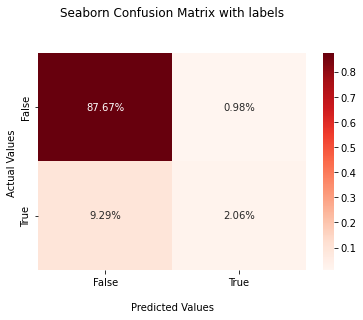

In [45]:
confunsionMatrix(cm) # confusion matrix

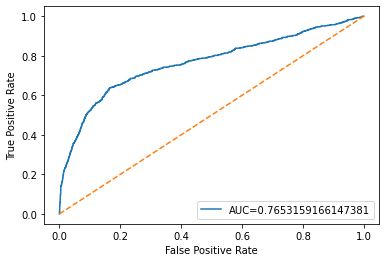

In [46]:
ROC_AUC(clf_lr.predict_proba(X_test)) # ROC and AUC

In [47]:
report = classification_report(y_test, predictions) # precision and recall and accuracy
print(report)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7303
           1       0.68      0.18      0.29       935

    accuracy                           0.90      8238
   macro avg       0.79      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



In [48]:
# LOGISTIC REGRESSION FEATURE SELECTION

In [49]:
lr = LogisticRegression(**clf_lr.best_params_).fit(X_train, y_train)

In [50]:
lr.coef_

array([[ 0.17543695,  0.12782513,  0.56749361, -1.02251315,  0.12038376,
        -1.32702467,  0.93486188,  0.54220509, -0.49835137, -1.28801253,
         0.0554821 , -0.20676996, -0.08484381, -0.0695139 , -0.01793336,
         0.31564217, -0.07172933, -0.19531928,  0.27467987,  0.09189538,
         0.05067092, -0.14197924, -0.07279949, -0.03688804,  0.05008555,
         0.05988355, -0.0013397 ,  0.01356942, -0.01194816, -0.00382863,
         0.01356942, -0.00945922, -0.46532168,  0.03404962,  0.43155363]])

In [51]:
coefs = pd.DataFrame(lr.coef_[0], index = X_train.columns, columns = ['Coef']).sort_values(by = 'Coef', ascending = False)
coefs

,Coef
cons.price.idx,0.934862
default,0.567494
cons.conf.idx,0.542205
poutcome_success,0.431554
job_retired,0.315642
job_student,0.274680
age,0.175437
education,0.127825
previous,0.120384
job_technician,0.091895


In [52]:
rfe = RFE(estimator = lr, n_features_to_select = 2).fit(X_train, y_train)

In [53]:
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [54]:
rfe.ranking_

array([19, 14,  2,  1, 18,  3,  4,  5,  6,  1, 23, 11, 15, 17, 30,  9, 16,
       12, 10, 22, 24, 13, 25, 26, 20, 21, 34, 27, 31, 33, 29, 32,  7, 28,
        8])

In [55]:
df_features = pd.DataFrame()

df_features['names'] = X_train.columns
df_features['rank'] = rfe.ranking_

df_features.sort_values('rank')

,names,rank
3,pdays,1
9,nr.employed,1
2,default,2
5,emp.var.rate,3
6,cons.price.idx,4
7,cons.conf.idx,5
8,euribor3m,6
32,poutcome_failure,7
34,poutcome_success,8
15,job_retired,9


In [56]:
# BANK COSTS WITH CAMPAING

In [57]:
y_preds = clf_lr.predict_proba(X_test)[:,1]

In [58]:
total_cost(y_test, y_preds, threshold = 0.5) # cost according to model

1570500

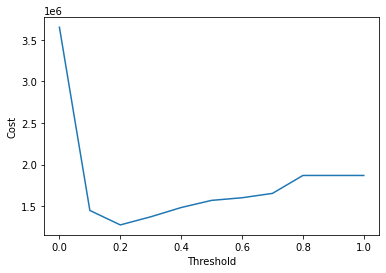

In [59]:
min_cost_threshold(y_test, y_preds)

In [60]:
total_cost(y_test, y_preds, threshold = 0.2) # cost but changing the threshold

1275500

# KNN


In [61]:
knn = KNeighborsClassifier()

In [62]:
%%time

for k in range(1, 200, 10):

  knn = KNeighborsClassifier(n_neighbors = k, n_jobs=-1).fit(X_train, y_train)

  accuracy = knn.score(X_test, y_test)

  print('Accuracy for k = ', k , 'is: ', accuracy)

Accuracy for k =  1 is:  0.8436513716921583
Accuracy for k =  11 is:  0.8917212915756252
Accuracy for k =  21 is:  0.8947560087399854
Accuracy for k =  31 is:  0.895241563486283
Accuracy for k =  41 is:  0.896698227725176
Accuracy for k =  51 is:  0.8965768390386016
Accuracy for k =  61 is:  0.8973051711580481
Accuracy for k =  71 is:  0.8973051711580481
Accuracy for k =  81 is:  0.8970623937848993
Accuracy for k =  91 is:  0.896698227725176
Accuracy for k =  101 is:  0.8964554503520272
Accuracy for k =  111 is:  0.8959698956057296
Accuracy for k =  121 is:  0.8959698956057296
Accuracy for k =  131 is:  0.896091284292304
Accuracy for k =  141 is:  0.8959698956057296
Accuracy for k =  151 is:  0.896091284292304
Accuracy for k =  161 is:  0.8959698956057296
Accuracy for k =  171 is:  0.896091284292304
Accuracy for k =  181 is:  0.896091284292304
Accuracy for k =  191 is:  0.896091284292304
Wall time: 1min 53s


In [63]:
%%time

parameters = {'n_neighbors': range(60,71, 1)}

clf_knn = GridSearchCV(knn, parameters, cv = 5, n_jobs=-1).fit(X_train, y_train)

Wall time: 2min 53s


In [64]:
# KNN METRICS

In [65]:
clf_knn.best_score_ # accuracy

0.8981790591805765

In [66]:
clf_knn.best_estimator_

KNeighborsClassifier(n_jobs=-1, n_neighbors=68)

In [67]:
predictions = clf_knn.predict(X_test) 

In [68]:
cm = metrics.confusion_matrix(y_test, predictions) 

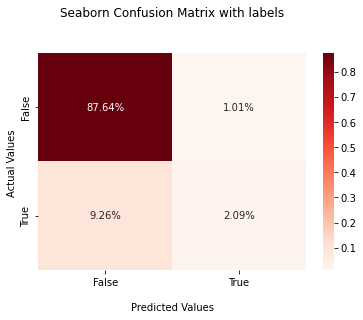

In [69]:
confunsionMatrix(cm) # confusion matrix

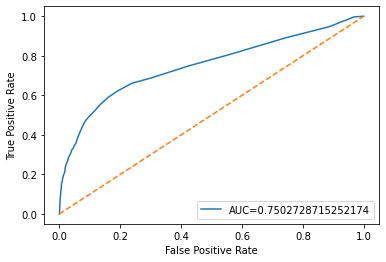

In [70]:
ROC_AUC(clf_knn.predict_proba(X_test)) # ROC and AUC

In [71]:
report = classification_report(y_test, predictions) # precision recall and accuracy
print(report)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7303
           1       0.67      0.18      0.29       935

    accuracy                           0.90      8238
   macro avg       0.79      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



In [72]:
# BANK COST WITH THE CAMPAING

In [73]:
y_preds = clf_knn.predict_proba(X_test)[:,1]

In [74]:
total_cost(y_test, y_preds, threshold = 0.5) #cost based on model

1567500

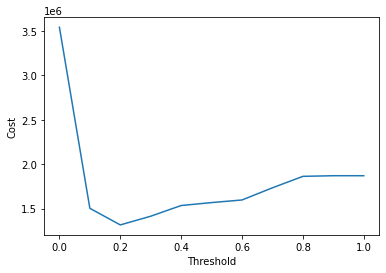

In [75]:
min_cost_threshold(y_test, y_preds)

In [76]:
total_cost(y_test, y_preds, threshold = 0.2) #cost changing the threshold

1316000

# DECISION TREE

In [77]:
tree = DecisionTreeClassifier(random_state = seed)

In [78]:
%%time

parameters = {'max_depth':[3, 6, 8], 'min_samples_split': [10, 20, 50]}

clf_tree = GridSearchCV(tree, parameters, cv = 5).fit(X_train, y_train)

Wall time: 2.18 s


In [79]:
# DECISION TREE METRICS

In [80]:
clf_tree.best_score_ # accuracy

0.8993323216995448

In [81]:
clf_tree.best_params_

{'max_depth': 3, 'min_samples_split': 10}

In [82]:
predictions = clf_tree.predict(X_test) 

In [83]:
cm = metrics.confusion_matrix(y_test, predictions) 

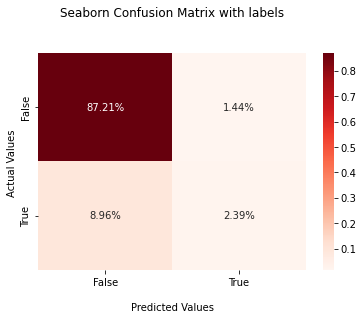

In [84]:
confunsionMatrix(cm) # confusion matrix

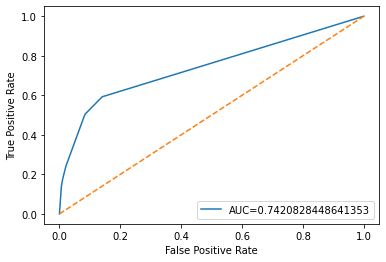

In [85]:
ROC_AUC(clf_tree.predict_proba(X_test)) # ROC and AUC

In [86]:
report = classification_report(y_test, predictions) # precision recall and accurany
print(report)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.62      0.21      0.31       935

    accuracy                           0.90      8238
   macro avg       0.77      0.60      0.63      8238
weighted avg       0.87      0.90      0.87      8238



In [87]:
# DECISION TREE FEATURE SELECTION

In [88]:
tree_4_feat = DecisionTreeClassifier(**clf_tree.best_params_).fit(X_train, y_train)

In [89]:
tree_4_feat.feature_importances_

array([0.        , 0.        , 0.        , 0.14597713, 0.        ,
       0.        , 0.        , 0.07128407, 0.0305695 , 0.7521693 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [90]:
list(zip(df.columns, tree_4_feat.feature_importances_))

[('age', 0.0),
 ('job', 0.0),
 ('marital', 0.0),
 ('education', 0.14597712935044685),
 ('default', 0.0),
 ('housing', 0.0),
 ('loan', 0.0),
 ('pdays', 0.0712840670393063),
 ('previous', 0.03056950391966547),
 ('poutcome', 0.7521692996905814),
 ('emp.var.rate', 0.0),
 ('cons.price.idx', 0.0),
 ('cons.conf.idx', 0.0),
 ('euribor3m', 0.0),
 ('nr.employed', 0.0),
 ('y', 0.0)]

In [91]:
# BANK COST WITH THE CAMPAING

In [92]:
y_preds = clf_tree.predict_proba(X_test)[:,1]

In [93]:
total_cost(y_test, y_preds, threshold = 0.5) #cost 

1535500

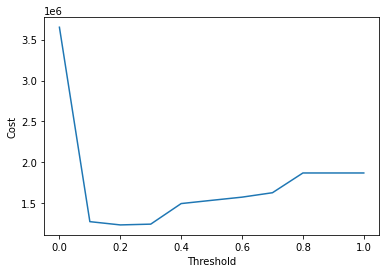

In [94]:
min_cost_threshold(y_test, y_preds)

In [95]:
total_cost(y_test, y_preds, threshold = 0.2) #cost changing the threshold

1235000

# RANDOM FOREST

In [96]:
clf_rf = RandomForestClassifier(random_state = seed)

In [97]:
parameters = {'n_estimators': [100, 500, 1000], 'max_depth': [5, 10], 'min_samples_split': [50, 100]}

In [98]:
%%time

clf_random_f = GridSearchCV(clf_rf, parameters, cv = 5, n_jobs=-1).fit(X_train, y_train)

Wall time: 47.7 s


In [99]:
y_preds = clf_random_f.predict(X_test)

In [100]:
# RANDOM FOREST METRICS

In [101]:
clf_random_f.best_params_

{'max_depth': 10, 'min_samples_split': 100, 'n_estimators': 500}

In [102]:
accuracy_score(y_test, y_preds) # accuracy

0.8973051711580481

In [103]:
predictions = clf_random_f.predict(X_test) 

In [104]:
cm = metrics.confusion_matrix(y_test, predictions) 

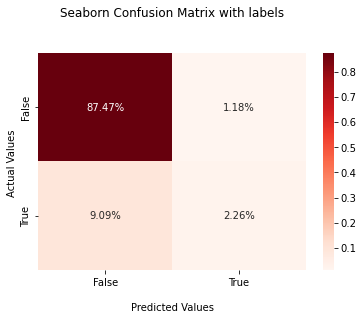

In [105]:
confunsionMatrix(cm) # confusion matrix

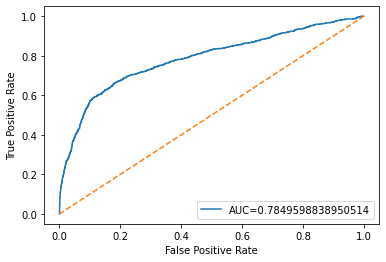

In [106]:
ROC_AUC(clf_random_f.predict_proba(X_test)) # ROC and AUC

In [107]:
report = classification_report(y_test, predictions) # precision recall and accurany
print(report)

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7303
           1       0.66      0.20      0.31       935

    accuracy                           0.90      8238
   macro avg       0.78      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



In [108]:
# RANDOM FOREST FEATURE SELECTION

In [109]:
rf = RandomForestClassifier(**clf_random_f.best_params_, random_state = seed).fit(X_train, y_train)

In [110]:
y_preds = rf.predict(X_test)

In [111]:
accuracy_score(y_test, y_preds)

0.8973051711580481

In [112]:
pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)

euribor3m               0.196537
nr.employed             0.190102
pdays                   0.103579
poutcome_success        0.101113
emp.var.rate            0.096209
cons.conf.idx           0.086250
cons.price.idx          0.066926
age                     0.035166
previous                0.028890
poutcome_failure        0.019106
poutcome_nonexistent    0.014580
education               0.009469
default                 0.007798
job_student             0.004849
job_blue-collar         0.004605
job_retired             0.004458
marital_single          0.002814
job_technician          0.002331
job_admin.              0.001859
marital_divorced        0.001796
job_services            0.001782
marital_married         0.001779
housing_no              0.001762
job_self-employed       0.001663
housing_yes             0.001526
job_unknown             0.001496
loan_no                 0.001493
job_housemaid           0.001407
loan_unknown            0.001396
housing_unknown         0.001376
job_unempl

In [113]:
# BANK COST WITH THE CAMPAING

In [114]:
y_preds = clf_random_f.predict_proba(X_test)[:,1]

In [115]:
total_cost(y_test, y_preds, threshold = 0.5) #cost 

1546500

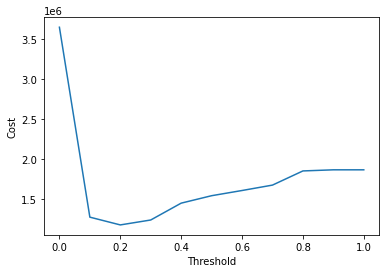

In [116]:
min_cost_threshold(y_test, y_preds)

In [117]:
total_cost(y_test, y_preds, threshold = 0.2) #cost 

1181500

# SVM

In [118]:
svc = SVC(random_state = seed, probability = True, verbose = True)

In [119]:
parameters = {'C':[1]} # Takes a long time, unable to test/run adiciontal parameters mainly C and kernel. This was what I manage whitout the notebook crashing :(

In [120]:
%%time

clf_svc = GridSearchCV(svc, parameters, cv = 5).fit(X_train, y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Wall time: 10min 44s


In [121]:
y_preds = clf_svc.predict(X_test)

In [122]:
# SVM METRICS

In [123]:
clf_svc.best_params_ # sadly this was the only parameter I was able to test. All other possibilities took too long

{'C': 1}

In [124]:
accuracy_score(y_test, y_preds) # accuracy

0.8968196164117505

In [125]:
predictions = clf_svc.predict(X_test) 

In [126]:
cm = metrics.confusion_matrix(y_test, predictions) 

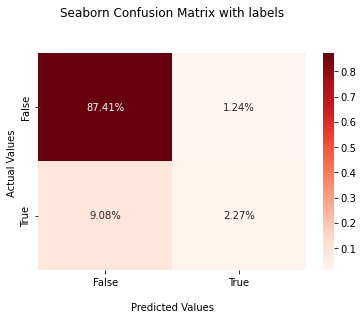

In [127]:
confunsionMatrix(cm) # confusion matrix

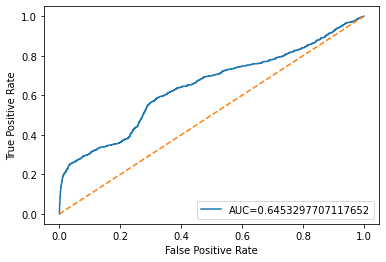

In [128]:
ROC_AUC(clf_svc.predict_proba(X_test)) # ROC and AUC

In [129]:
report = classification_report(y_test, predictions) # precision recall and accurany
print(report)

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7303
           1       0.65      0.20      0.31       935

    accuracy                           0.90      8238
   macro avg       0.78      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



In [130]:
# BANK COST WITH THE CAMPAING

In [131]:
y_preds = clf_svc.predict_proba(X_test)[:,1]

In [132]:
total_cost(y_test, y_preds, threshold = 0.5) # cost 

1560000

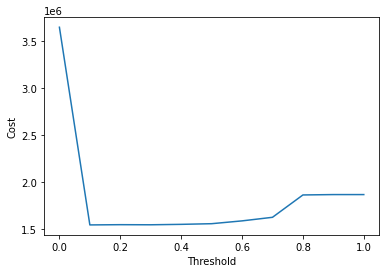

In [133]:
min_cost_threshold(y_test, y_preds)

In [134]:
total_cost(y_test, y_preds, threshold = 0.1) # cost with new threshold

1547000

# NEURAL NETWORKS

In [135]:
mlp = MLPClassifier(solver = 'lbfgs',  random_state = seed, max_iter = 1000 )

In [136]:
parameters = {'hidden_layer_sizes': [(20,), (20,10), (20, 10, 2)], 'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}

In [137]:
%%time

clf_mlp = GridSearchCV(mlp, parameters, cv = 5).fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Wall time: 16min 4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [138]:
y_preds = clf_mlp.predict(X_test)

In [139]:
# MLP METRICS

In [140]:
clf_mlp.best_params_

{'hidden_layer_sizes': (20, 10), 'learning_rate_init': 0.0001}

In [141]:
accuracy_score(y_test, y_preds) # accuracy

0.8941490653071134

In [142]:
predictions = clf_mlp.predict(X_test) 

In [143]:
cm = metrics.confusion_matrix(y_test, predictions)

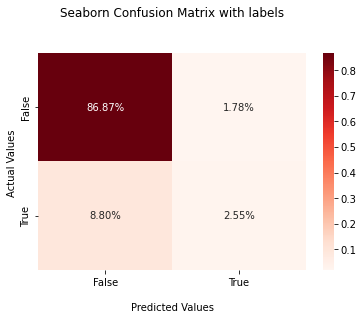

In [144]:
confunsionMatrix(cm) # confusion matrix

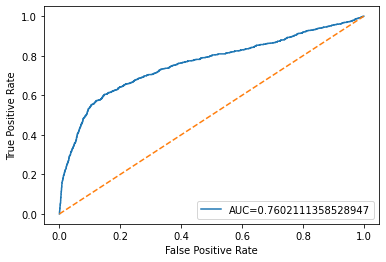

In [145]:
ROC_AUC(clf_mlp.predict_proba(X_test)) # ROC and AUC

In [146]:
report = classification_report(y_test, predictions) # precision recall and accurany
print(report)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.59      0.22      0.33       935

    accuracy                           0.89      8238
   macro avg       0.75      0.60      0.63      8238
weighted avg       0.87      0.89      0.87      8238



In [147]:
# BANK COST WITH THE CAMPAING

In [148]:
y_preds = clf_mlp.predict_proba(X_test)[:,1]

In [149]:
total_cost(y_test, y_preds, threshold = 0.5) # cost 

1523500

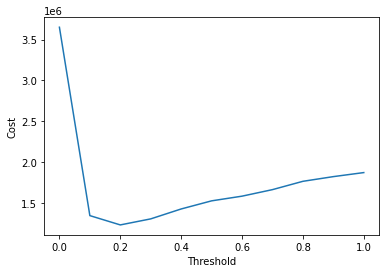

In [150]:
min_cost_threshold(y_test, y_preds)

In [151]:
total_cost(y_test, y_preds, threshold = 0.2) # cost with new threshold

1228500

# RANDOM FOREST with Feature Selection

In [152]:
clf_rf = RandomForestClassifier(random_state = seed)

In [153]:
parameters = {'n_estimators': [500], 'max_depth': [10], 'min_samples_split': [100]}

In [154]:
%%time

clf_random_f = GridSearchCV(clf_rf, parameters, cv = 5, n_jobs=-1).fit(X_train[['euribor3m', 'nr.employed', 'pdays', 'poutcome_success']], y_train)

Wall time: 10.2 s


In [155]:
y_preds = clf_random_f.predict(X_test[['euribor3m', 'nr.employed', 'pdays', 'poutcome_success']])

In [156]:
clf_random_f.best_params_

{'max_depth': 10, 'min_samples_split': 100, 'n_estimators': 500}

In [157]:
accuracy_score(y_test, y_preds) # accuracy

0.8971837824714737

In [158]:
predictions = clf_random_f.predict(X_test[['euribor3m', 'nr.employed', 'pdays', 'poutcome_success']]) 

In [159]:
cm = metrics.confusion_matrix(y_test, predictions) 

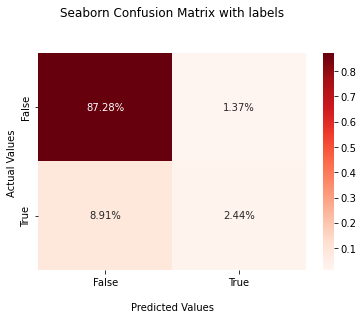

In [160]:
confunsionMatrix(cm) # confusion matrix

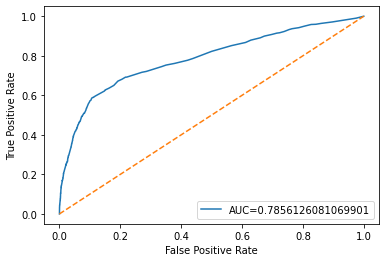

In [161]:
ROC_AUC(clf_random_f.predict_proba(X_test[['euribor3m', 'nr.employed', 'pdays', 'poutcome_success']])) # ROC and AUC

In [162]:
report = classification_report(y_test, predictions) # precision recall and accurany
print(report)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.64      0.21      0.32       935

    accuracy                           0.90      8238
   macro avg       0.77      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238



In [163]:
# BANK COST WITH THE CAMPAING

In [164]:
y_preds = clf_random_f.predict_proba(X_test[['euribor3m', 'nr.employed', 'pdays', 'poutcome_success']])[:,1]

In [165]:
total_cost(y_test, y_preds, threshold = 0.5) # cost 

1524500

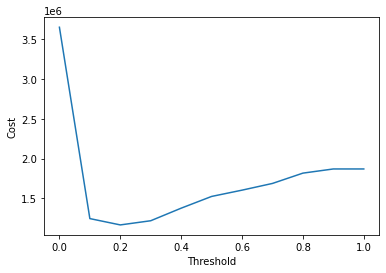

In [166]:
min_cost_threshold(y_test, y_preds)

In [167]:
total_cost(y_test, y_preds, threshold = 0.2) # cost with new threshold

1166500

QUESTIONS:¶
1. How many features are available? How many customers?

The dataset have composed by 16 features and 41188 clients. There were several categorical features.


2. How many customers do you have in the dataset that actually joined the term deposit? And how many did not?

36548 clients didn't subscribe to the deposite while 4640 did


3. What are the most relevant features to decide if a customer is more likely to adhere to the term deposit?

According with the best model, the 4 more important features were 'euribor3m', 'nr.employed', 'pdays' and 'poutcome_success'


4. Which algorithm led to the best results?

The algorith with best results was the random forest model. Before feature selection this model predicted the least cost to the bank. This results was slightly improved after feature selection.


5. Which evaluation metrics did you use to compare the performance of the various models? Why?

For classification problems there are several metrics which I showed for all models: accuracy, precision, recall and AUC. I alse showed the confusion matrix because in this case is quite important as we are focusing on  false positives and false negatives since these situations carry and aditional cost. This final cost to the bank was the final and most import metric to evaluate a model.


6. What is the cost of the bank without any model?

Whitout any model the bank would have a cost of 3651500 euros (considering that all clients would subscribe the deposit)


7. What is the cost that the bank will have with your model?

With the chosen model the bank only loses 1166500 euros, saving 2449500 euros.





Notes:

Unfortunately, I was a bit tight on time. Ideally, I would have tried to run the logistic regression, decision tree and random forest without normalizing the data and then try with the normalized dataset.

I would have tried the several models without the categorical features and only then replacing them with ordinal encoding and OHE.

Would also be nice to try all the models with feature selection, instead of only the best model.
Lastly, I would have tried to run the SVM model with more parameters, however I was facing several technical difficulties, with the notebook crashing, or google colab timing out. Several solutions were tried to solve the colab issue but with no result. 
